In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	1
float64		column 3	1
float64		column 4	3
float64		column 5	3
float64		column 6	4
float64		column 7	2
float64		column 8	2
float64		column 9	3
float64		column 10	6
float64		column 11	5
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,400.000000,399.000000,399.000000,397.000000,397.000000,396.000000,398.000000,398.000000,397.000000,394.000000,395.000000,394.000000
mean,-0.100319,0.062550,2.035468,1.904298,1.931670,1.982211,2.022211,1.983393,1.965730,2.026352,1.965499,1.957710
std,2.564450,2.771772,1.131673,1.146645,1.164097,1.140019,1.162030,1.141638,1.149919,1.158671,1.154721,1.198595
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.044882,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.694850,-0.831840,1.121050,0.945100,0.879350,1.044075,0.981695,1.030050,0.996580,1.039575,0.911385,0.904190
50%,-0.068013,0.021200,2.089000,1.789600,1.915100,2.021800,2.094400,1.966950,2.069100,2.088500,1.920700,1.914800
75%,0.763967,0.897005,2.986300,2.829000,2.955100,2.966250,2.973450,3.020100,2.940300,3.046400,2.967150,3.008675
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

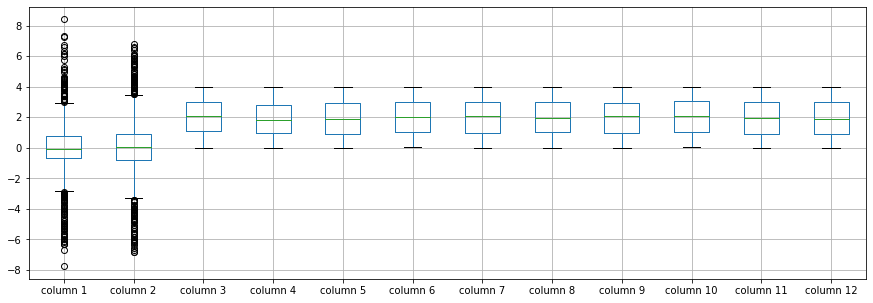

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.100319
column 2     0.062550
column 3     2.035468
column 4     1.904298
column 5     1.931670
column 6     1.982211
column 7     2.022211
column 8     1.983393
column 9     1.965730
column 10    2.026352
column 11    1.965499
column 12    1.957710
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.018206,-0.057452,-0.072885,0.001695,-0.009012,-0.014940,0.024760,-0.024729,0.038735,0.080739,-0.016470
column 2,0.018206,1.000000,-0.044837,0.036127,-0.086965,-0.086895,0.013562,-0.020383,-0.014639,0.014834,-0.024099,0.063000
column 3,-0.057452,-0.044837,1.000000,0.006394,-0.022709,-0.061875,-0.083982,0.073173,0.115839,-0.023935,-0.088186,-0.000584
column 4,-0.072885,0.036127,0.006394,1.000000,-0.011944,0.106132,0.002636,0.083022,-0.010355,0.064395,-0.034023,-0.054823
column 5,0.001695,-0.086965,-0.022709,-0.011944,1.000000,0.091539,0.029689,0.008492,0.000578,0.010180,0.009577,-0.033196
column 6,-0.009012,-0.086895,-0.061875,0.106132,0.091539,1.000000,0.007853,0.053385,0.005872,-0.001402,0.019247,-0.044458
column 7,-0.014940,0.013562,-0.083982,0.002636,0.029689,0.007853,1.000000,-0.020554,0.084680,0.044389,0.004232,-0.064185
column 8,0.024760,-0.020383,0.073173,0.083022,0.008492,0.053385,-0.020554,1.000000,0.057200,-0.131696,-0.058911,-0.017375
column 9,-0.024729,-0.014639,0.115839,-0.010355,0.000578,0.005872,0.084680,0.057200,1.000000,0.010091,0.007334,0.050565
column 10,0.038735,0.014834,-0.023935,0.064395,0.010180,-0.001402,0.044389,-0.131696,0.010091,1.000000,0.011804,0.035045


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+34,12+34+34,12+34+34+34,12+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34,12+34+34+34,12+34+34,12+34,12], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.723330841064453
Epoch: 1 , loss: 27.687202911376954
Epoch: 2 , loss: 27.590083084106446
Epoch: 3 , loss: 27.410624084472655
Epoch: 4 , loss: 26.987721939086914
Epoch: 5 , loss: 25.27866943359375
Epoch: 6 , loss: 23.0454052734375
Epoch: 7 , loss: 22.369205398559572
Epoch: 8 , loss: 21.99779685974121
Epoch: 9 , loss: 21.93321403503418
Epoch: 10 , loss: 21.64532035827637
Epoch: 11 , loss: 21.334291305541992
Epoch: 12 , loss: 21.02638236999512
Epoch: 13 , loss: 20.713115997314453
Epoch: 14 , loss: 20.649930419921876
Epoch: 15 , loss: 20.321853713989256
Epoch: 16 , loss: 20.30147644042969
Epoch: 17 , loss: 20.107486724853516
Epoch: 18 , loss: 20.294297409057616
Epoch: 19 , loss: 19.675815658569334
Epoch: 20 , loss: 19.744156265258788
Epoch: 21 , loss: 20.00946075439453
Epoch: 22 , loss: 19.75584182739258
Epoch: 23 , loss: 19.616230850219726
Epoch: 24 , loss: 19.653026123046875
Epoch: 25 , loss: 19.461220

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.950742747856538, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.04869556553513184

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AE_1(imp).xlsx", index=False, header=False)